In [1]:
x = var('x')
mu = var('mu')

In [2]:
# logistic map
def f(x, mu) :
    return (mu*x*(1-x))

In [3]:
def cobweb(mu, xvals) :
  plt  = plot( x, x, 0, 1 , color="black", aspect_ratio='1', figsize=5)
  plt += line(((0,1),(1,1),(1,0)), color="lightgray")
  plt += plot( f(x, mu), x, 0, 1, color="green", thickness=3 )

  color   = 0
  Ncolors = len(xvals)
  for x0 in xvals :
    x1 = f(x0, mu)    
    cob_line = [(x0,0), (x0,x1)]
    for i in range(10) :
       x2 = f(x1, mu)
       cob_line += [(x0,x1), (x1,x1), (x1,x2)]
       x0 = x1
       x1 = x2        

    plt += line(cob_line, color=hue(.8-float(color)/(1.8*Ncolors)))
    color += 1

  xi = 0.1
  for dummy in range(1000) :
    xi = f(xi, mu)
    
  attractor = [(xi,1)] 
  for dummy in range(1000) :
    xi = f(xi, mu)
    attractor.append((xi,1))
    
  plt += point(attractor, color="blue")

  return show( plt )

In [4]:
@interact
def _( mu = slider(0, 4, step_size=0.01) ):

    show( cobweb( mu, (0.2, 0.5)) )

In [5]:
@interact
# 2.9 -- 3.45
def _( mu = slider(3.45, 3.8, step_size=0.01) ):
    h(x) = f(x, mu)
    g(x) = ( h(h(h(h(h(h(h(h(x)))))))) )
    iterPlt = plot( g(x), x, 0, 1, figsize=5 )
    iterPlt += plot( x, x, 0, 1, color="darkgray")
    
    
    
    show( iterPlt )

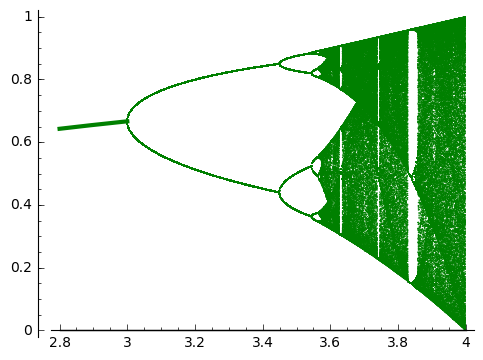

In [15]:
xMin = 2.8

pBif = plot( 0, x, xMin, 4, ymin=0, ymax=1, color="black", figsize=5)

if xMin < 1 :
  pBif += plot( 0, x, xMin, 1, color="green", thickness=3 )
  pBif += plot( 1-1/x, x, 1, 3, color="green", thickness=3 )

elif xMin < 3 :
  pBif += plot( 1-1/x, x, xMin, 3, color="green", thickness=3 )

resolution = 500
for inc in range(resolution) :
  mu = 3 + inc/resolution
  xi = 0.1
  for dummy in range(1000) :
    xi = f(xi, mu)
    
  attractor = [(mu,xi)] 
  for dummy in range(500) :
    xi = f(xi, mu)
    attractor.append((mu, xi))
    
  pBif += point(attractor, color="green", size=1)


show( pBif )